In [1]:
# 작업 경로 설정
import os
os.chdir(r"C:\dacon\ch03")

# pandas 라이브러리
import pandas as pd

## 1. Unique한 장소 추출

In [2]:
# 데이터 로드
life = pd.read_csv('jeju_financial_life_data.csv')[['x_axis', 'y_axis']]
train = pd.read_csv('train.csv')[['latitude','longitude']]
test = pd.read_csv('test.csv')[['latitude','longitude']]
df = pd.concat([train, test], axis=0)

### 1.1 df(train, test)

In [3]:
# location(latitude + longitude) 변수 생성
df['location'] = df['latitude'].astype(str) + ',' + df['longitude'].astype(str)
df = df[['location','longitude','latitude']]
df.head()

,location,longitude,latitude
0,"33.4899,126.49373",126.49373,33.48990
1,"33.48944,126.48508",126.48508,33.48944
2,"33.48181,126.47352",126.47352,33.48181
3,"33.50577,126.49252",126.49252,33.50577
4,"33.255790000000005,126.4126",126.41260,33.25579


In [4]:
# unique한 장소 추출
location_df = pd.DataFrame(df.location.unique(), columns=['location'])
location_df['latitude'] = location_df.location.str.split(',').str[0]
location_df['longitude'] = location_df.location.str.split(',').str[1]
location_df.shape # 총 3600개의 데이터

(3600, 3)

In [5]:
# csv 파일 저장
location_df.to_csv('df_unique_loc.csv',encoding='cp949',index=False)

### 1.2 jeju_financial_life_data

In [6]:
# location(y_axis + x_axis) 변수 생성
life['latitude'] = life['y_axis'].astype(str).str[:10]
life['longitude'] = life['x_axis'].astype(str).str[:10]
life['location'] = life['latitude'] + ',' + life['longitude']
life = life[['location','longitude','latitude']]
life.head()

,location,longitude,latitude
0,"33.5132095,126.565889",126.565889,33.5132095
1,"33.2472248,126.497120",126.497120,33.2472248
2,"33.2472248,126.497120",126.497120,33.2472248
3,"33.2472248,126.497120",126.497120,33.2472248
4,"33.2472248,126.497120",126.497120,33.2472248


In [7]:
# unique한 장소 추출
location_life = pd.DataFrame(life.location.unique(),columns=['location'])
location_life['latitude'] = location_life.location.str.split(',').str[0]
location_life['longitude'] = location_life.location.str.split(',').str[1]
location_life.shape # 총 474개의 데이터

(474, 3)

In [8]:
# csv 파일 저장
location_life.to_csv('life_unique_loc.csv',encoding='cp949',index=False)

## 2. 지오코딩 프로그램(Geocorder-Xr)을 통해 행정 구역 이름을 추출

### 2-1. 지오코딩 환경설정

* 1. http://www.gisdeveloper.co.kr/?p=4784에 접속
* 2. Installer_DuraMap-Xr를 먼저 실행하고, Geocorder-Xr_(해당버전) 폴더에서 XrGeocoder 를 실행
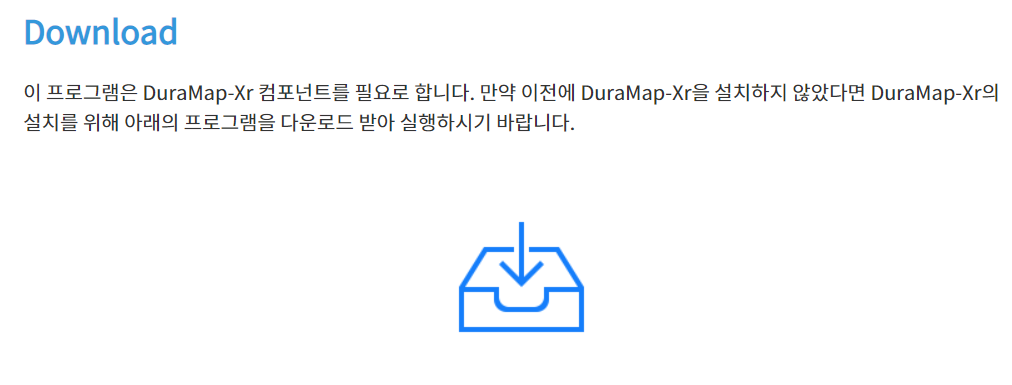

### 2-2. 지오코딩 사용하기

life_unique_loc.csv

* [입력 파일]을 클릭하고 life_unique_loc.csv를 선택합니다.
* [좌표→주소]를 선택하고 경도 필드를 longitude, 위도 필드를 latitude로 설정합니다.
* [결과 SHP 파일]에 location_life를 입력 후 [결과를 CSV 파일 형태로도 저장]을 체크하고 시작을 누릅니다.

df_unique_loc.csv

* [입력 파일]을 클릭하고 df_unique_local.csv를 선택합니다.
* [좌표→주소]를 선택하고 경도 필드를 longitude, 위도 필드를 latitude로 설정합니다.
* [결과 SHP 파일]에 location_df를 입력 후 [결과를 CSV 파일 형태로도 저장]을 체크하고 시작을 누릅니다.

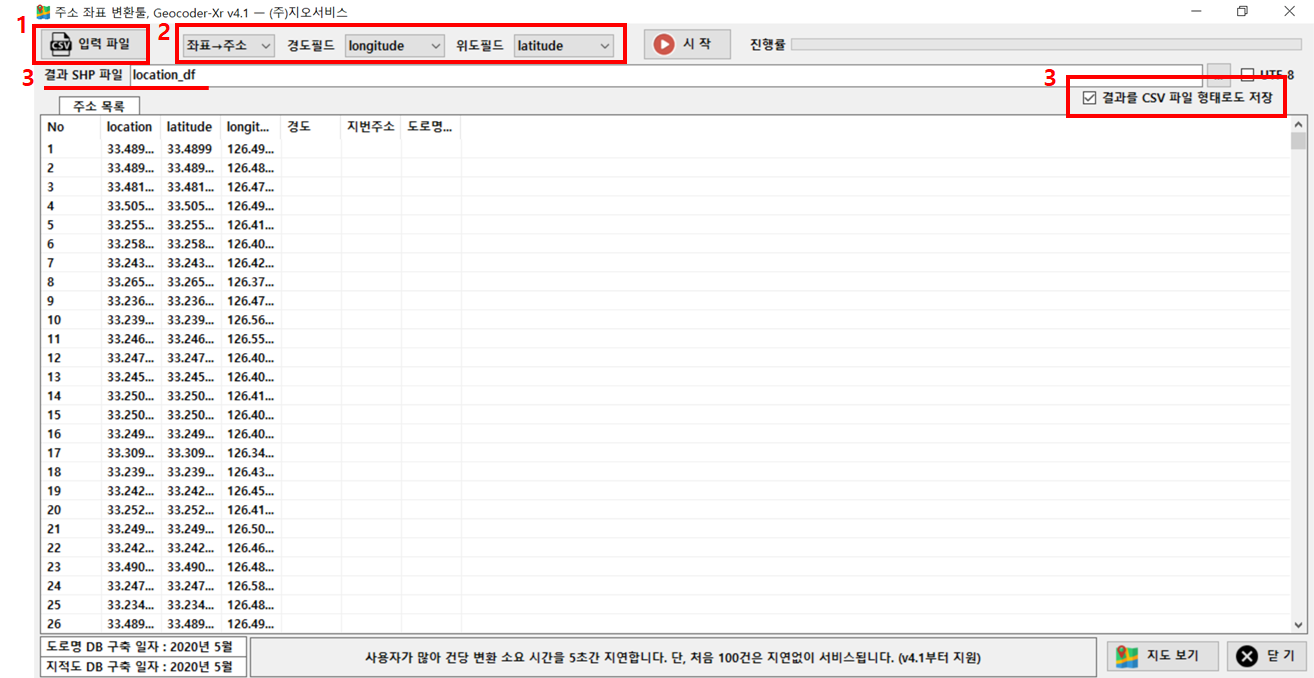

## 3. df_location.csv & life_location.csv 생성하기

### 3.1 df_location

In [9]:
df_location = pd.read_csv('location_df.csv', encoding='cp949')

In [10]:
# NA값 확인하기
df_location[df_location['지번주소'].isnull()==True]

,No,location,latitude,longitude,경도,지번주소,도로명주소
77,78,"33.96141,126.29452",33.96141,126.29452,NaN,NaN,제주특별자치도 제주시 추자면 추자로 68
198,199,"33.469159999999995,126.54777",33.46916,126.54777,NaN,NaN,제주특별자치도 제주시 중앙로 613
1383,1384,"33.519009999999994,126.48947",33.51901,126.48947,NaN,NaN,제주특별자치도 제주시 서해안로 472
1386,1387,"33.51362,126.48435",33.51362,126.48435,NaN,NaN,제주특별자치도 제주시 서해안로 386
1432,1433,"33.263729999999995,126.61113",33.26373,126.61113,NaN,NaN,제주특별자치도 서귀포시 효돈순환로 358
1480,1481,"33.2642,126.61324",33.26420,126.61324,NaN,NaN,제주특별자치도 서귀포시 효돈로 133
1497,1498,"33.24317,126.59808",33.24317,126.59808,NaN,NaN,제주특별자치도 서귀포시 칠십리로 436
1875,1876,"33.47464,126.40904",33.47464,126.40904,NaN,NaN,제주특별자치도 제주시 애월읍 항몽로 107
2047,2048,"33.30731,126.78144",33.30731,126.78144,NaN,NaN,제주특별자치도 서귀포시 표선면 일주동로 6464
2113,2114,"33.23178,126.23817",33.23178,126.23817,NaN,NaN,제주특별자치도 서귀포시 대정읍 동일하모로 37


지번주소 변수에서 NA값이 존재하는 행의 위도, 경도를 '구글맵'에 검색하여 얻은 주소입니다.

In [11]:
# NA값 채우기
df_location.loc[77,'지번주소'] = '제주특별자치도 제주시 추자면'
df_location.loc[198,'지번주소'] = '제주특별자치도 제주시 아라일동 1810-2'
df_location.loc[1383,'지번주소'] = '제주특별자치도 제주시 용담2동'
df_location.loc[1386,'지번주소'] = '제주특별자치도 제주시 용담2동'
df_location.loc[1432,'지번주소'] = '제주특별자치도 서귀포시 신효동' 
df_location.loc[1480,'지번주소'] = '제주특별자치도 서귀포시 신효동'
df_location.loc[1497,'지번주소'] = '제주특별자치도 서귀포시 보목동' 
df_location.loc[1875,'지번주소'] = '제주특별자치도 제주시 애월읍'
df_location.loc[2047,'지번주소'] = '제주특별자치도 제주시 표선면'
df_location.loc[2113,'지번주소'] = '제주특별자치도 제주시 대정읍'
df_location.loc[2846,'지번주소'] = '제주특별자치도 제주시 대정읍'
df_location.loc[2991,'지번주소'] = '제주특별자치도 제주시 추자면'
df_location.loc[2993,'지번주소'] = '제주특별자치도 제주시 추자면'
df_location.loc[3043,'지번주소'] = '제주특별자치도 제주시 신효동'
df_location.loc[3303,'지번주소'] = '제주특별자치도 제주시 애월읍'
df_location.loc[3324,'지번주소'] = '제주특별자치도 제주시 신효동' 

In [12]:
# 다시 확인하기
df_location[df_location['지번주소'].isnull()==True]

,No,location,latitude,longitude,경도,지번주소,도로명주소


In [13]:
# 필요없는 열 삭제
del df_location['경도']
del df_location['No']

In [14]:
# 시와 동 추출하기
si = []
dong = []
for i in range(0, len(df_location)):
    si.append(df_location['지번주소'].astype(str)[i].split(' ')[1])
    dong.append(df_location['지번주소'].astype(str)[i].split(' ')[2])

In [15]:
df_si_dong = pd.DataFrame({'si':list(si), 'dong':list(dong)})

In [16]:
df_location = pd.concat([df_si_dong, df_location], axis=1)

In [17]:
# 파일 저장하기
df_location.to_csv('df_location.csv',encoding='cp949',index=False)

### 3.2 life_location

In [18]:
life_location = pd.read_csv('location_life.csv', encoding='cp949')

In [19]:
# NA값 확인하기
life_location[life_location['지번주소'].isnull()==True]

,No,location,latitude,longitude,경도,지번주소,도로명주소
156,157,"33.5173688,126.528904",33.517369,126.528904,NaN,NaN,제주특별자치도 제주시 임항로 37-6


지번주소 변수에서 NA값이 존재하는 행의 위도, 경도를 '구글맵'에 검색하여 얻은 주소입니다.

In [20]:
# NA값 채우기
life_location.loc[156,'지번주소']='제주특별자치도 제주시 건입동'

In [21]:
# 다시 확인하기
life_location[life_location['지번주소'].isnull()==True]

,No,location,latitude,longitude,경도,지번주소,도로명주소


In [22]:
# 필요없는 열 삭제
del life_location['경도']
del life_location['No']

In [23]:
# 시와 동 추출하기
si = []
dong = []
for i in range(0, len(life_location)):
    si.append(life_location['지번주소'].astype(str)[i].split(' ')[1])
    dong.append(life_location['지번주소'].astype(str)[i].split(' ')[2])

In [24]:
life_si_dong = pd.DataFrame({'si':list(si), 'dong':list(dong)})

In [25]:
life_location = pd.concat([life_si_dong, life_location], axis=1)

In [26]:
# 파일 저장하기
life_location.to_csv('life_location.csv',encoding='cp949',index=False)